<a id='intro'></a>
## 1. Introduction

In [261]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [262]:
data = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## 2. Data Wrangling

### General Properties

In [84]:
data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [85]:
data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [86]:
data['release_date'] = pd.to_datetime(data['release_date'])

In [253]:
for col in data:
  num_of_null = data[col].isnull().sum()
  print(col, num_of_null)

id 0
imdb_id 10
popularity 0
budget 0
revenue 0
original_title 0
cast 76
director 44
tagline 2824
keywords 1493
overview 4
runtime 0
genres 23
production_companies 1030
release_date 0
vote_count 0
vote_average 0
release_year 0
budget_adj 0
revenue_adj 0



### Data Cleaning

In [265]:
data.drop('homepage', axis=1, inplace=True)
data.drop('imdb_id', axis=1, inplace=True)
data.drop('homepage', axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### How is the development of cinema industry by time?

In [274]:
#Show all genres
genres_list = []
for index, record in data.iterrows():
  genres_of_film = str(record['genres']).split('|')
  for genres in genres_of_film:
    if genres not in genres_list:
      genres_list.append(genres)
genres_list.remove('nan')
print(genres_list)   

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'Foreign']


In [275]:
#Show all genres
years_list = []
for index, record in data.iterrows():
  year = int(record['release_year'])
  if year not in years_list:
    years_list.append(year)
years_list.sort()
# years_list = years_list.sort()
print(years_list)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [266]:
types = {
  'Drama': ['Drama', 'Family', 'Comedy', 'Romance', 'Music'],
  'Action/Adventure': ['Action', 'Crime', 'Western', 'Adventure', 'Science Fiction', 'Fantasy', 'Thriller'],
  # 'Adventure': ['Adventure', 'Science Fiction', 'Fantasy'],
  'Documentary': ['War', 'History', 'Documentary', 'Foreign'],
  'Animation': ['Animation'],
  'TV Movie': ['TV Movie'],
  'Horror': ['Horror', 'Mystery', 'Thriller']
}



In [267]:
def generate_types_film(genres):
    genres_list = genres.split('|')
    result = []
    for ele in genres_list:
        for type in types.keys():
            if ele in types[type] and type not in result:
                result.append(type)
    return result

metrics = {}

for index, record in data.iterrows():
    year = record['release_year']
    genres = record['genres']
    rating = record['vote_average']
    highrating = 1 if rating >= 7 else 0
    type_film = generate_types_film(str(genres))
    # print(record['original_title'], type_film)
    if record['revenue'] == 0 or record['budget'] == 0:
        continue
    roe = min(record['revenue']/record['budget'] - 1, 200)
    for type in type_film:
        key = str(year) + " " + type
        if key not in metrics:
            metrics[key] = [1, roe, rating, highrating]
        else:
            metrics[key][0] += 1
            metrics[key][1] += roe
            metrics[key][2] += rating
            metrics[key][3] += highrating


col_year = []
col_type = []
for year in years_list:
    for type in types.keys():
        col_year.append(year)
        col_type.append(type)
        

q1 = pd.DataFrame({'year': col_year, 'type': col_type})
q1.head()

col_count = []
col_roe = []
col_rating = []
col_highrating = []

for index, record in q1.iterrows():
    year = record['year']
    type = record['type']
    key = str(year) + " " + type
    try:
        count = metrics[key][0]
        col_count.append(count)
        roe = metrics[key][1]
        col_roe.append(round(roe/count,1))
        rating = metrics[key][2]
        col_rating.append(round(rating/count,1))
        highrating = metrics[key][3]
        col_highrating.append(round(highrating/count*100))
    except:
        col_count.append(0)
        col_roe.append(0)
        col_rating.append(0)
        col_highrating.append(0)

q1['count'] = col_count
q1['roe'] = col_roe
q1['rating'] = col_rating
q1['highrating'] = col_highrating

q1.head()


,year,type,count,roe,rating,highrating
0,1960,Drama,4,12.8,7.5,75
1,1960,Action/Adventure,3,14.7,7.3,67
2,1960,Documentary,1,4.0,6.9,0
3,1960,Animation,0,0.0,0.0,0
4,1960,TV Movie,0,0.0,0.0,0


Text(0, 0.5, 'number of films')

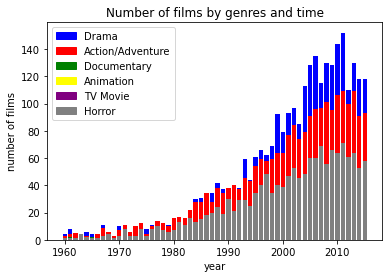

In [268]:
colors = {
  'Drama': 'blue',
  'Action/Adventure': 'red',
  # 'Adventure': 'orange',
  'Documentary': 'green',
  'Animation': 'yellow',
  'TV Movie': 'purple',
  'Horror': 'grey'
}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
c = q1['type'].apply(lambda x: colors[x])

bars = plt.bar(q1['year'], q1['count'], color=c, label=labels)
plt.legend(handles, labels)
plt.title('Number of films by genres and time')
plt.xlabel('year')
plt.ylabel('number of films')


Text(0, 0.5, 'Average ROE (%)')

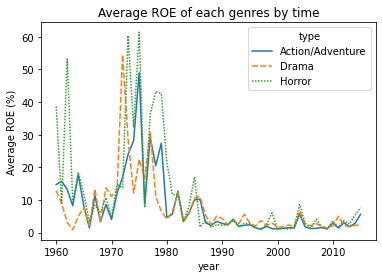

In [269]:
option = ['Horror', 'Drama', 'Action/Adventure']
q1_type = q1[q1['type'].isin(option)]
q1_roe = q1_type.pivot("year", "type", "roe")
sns.lineplot(data=q1_roe)
plt.title('Average ROE of each genres by time')
plt.xlabel('year')
plt.ylabel('Average ROE (%)')

Text(0, 0.5, 'Rating')

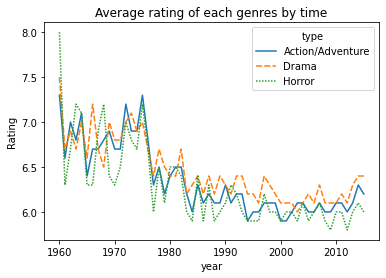

In [270]:
q1_rating = q1_type.pivot("year", "type", "rating")
sns.lineplot(data=q1_rating)
plt.title('Average rating of each genres by time')
plt.xlabel('year')
plt.ylabel('Rating')

Text(0, 0.5, 'Percentage (%)')

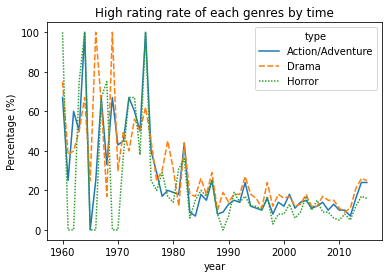

In [271]:
q1_highrating = q1_type.pivot("year", "type", "highrating")
sns.lineplot(data=q1_highrating)
plt.title('High rating rate of each genres by time')
plt.xlabel('year')
plt.ylabel('Percentage (%)')

### How is the change of trending concept happend in case of horror genre?

In [276]:
def horror_yn(genres):
    yn = 0
    for ele in types['Horror']:
        if ele in genres:
            yn = 1
    return yn

def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    return sub_li

def year_group(year):
    if year == 1960:
        return 1965
    else:
        distance = year - 1960
        period = int(distance/5)
        period = period + 1 if distance % 5 > 0 else period
        return 1960 + period*5

def add_keyword(result, group, keywords):
    keywords = keywords.split('|')
    for kw in keywords:
        if kw == 'nan':
            continue
        if group not in result.keys():
           result[group] = {kw: 1}
        else:
            if kw in result[group].keys():
                result[group][kw] += 1
            else:
                result[group][kw] = 1
    return result

def generate_top5(keywords_by_group):
    top5 = {}
    for group in keywords_by_group.keys(): 
        top5[group] = []   
        for kw, value in keywords_by_group[group].items():
            ele = [kw, value]
            top5[group].append(ele)
        top5[group] = Sort(top5[group])
        top5[group] = top5[group][-5:]
    return top5

mostPopular_keywords_by_group = {}
highRating_keywords_by_group = {}

for index, record in data.iterrows():
    year = record['release_year']
    genres = record['genres']
    rating = record['vote_average']
    if horror_yn(str(genres)) == 0:
        continue
    group = year_group(year)
    keywords = record['keywords']
    
    if rating >= 6.5:
        highRating_keywords_by_group = add_keyword(highRating_keywords_by_group, group, str(keywords))
    mostPopular_keywords_by_group = add_keyword(mostPopular_keywords_by_group, group, str(keywords))
    

top5_mostPopular = generate_top5(mostPopular_keywords_by_group)
top5_highRating = generate_top5(highRating_keywords_by_group)
